# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): 

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: 

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downladed file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


Saved under pizza_steak (7).zip


## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!python -m ls pizza_steak

c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\tensorflow\Scripts\python.exe: No module named ls


In [3]:
ls pizza_steak

 Volume in drive C has no label.
 Volume Serial Number is D872-C31F

 Directory of c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\pizza_steak

10/08/2023  05:35 p. m.    <DIR>          .
10/08/2023  05:35 p. m.    <DIR>          ..
10/08/2023  05:35 p. m.    <DIR>          test
10/08/2023  05:35 p. m.    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  169,923,469,312 bytes free


In [4]:
ls pizza_steak\train\steak

 Volume in drive C has no label.
 Volume Serial Number is D872-C31F

 Directory of c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\pizza_steak\train\steak

10/08/2023  05:35 p. m.    <DIR>          .
10/08/2023  05:35 p. m.    <DIR>          ..
19/08/2023  12:42 p. m.            36,185 1000205.jpg
19/08/2023  12:42 p. m.            34,497 100135.jpg
19/08/2023  12:42 p. m.           116,802 101312.jpg
19/08/2023  12:42 p. m.            56,754 1021458.jpg
19/08/2023  12:42 p. m.            34,143 1032846.jpg
19/08/2023  12:42 p. m.            24,688 10380.jpg
19/08/2023  12:42 p. m.            37,134 1049459.jpg
19/08/2023  12:42 p. m.            49,841 1053665.jpg
19/08/2023  12:42 p. m.            59,983 1068516.jpg
19/08/2023  12:42 p. m.            28,996 1068975.jpg
19/08/2023  12:42 p. m.            29,525 1081258.jpg
19/08/2023  12:42 p. m.            49,577 1090122.jpg
19/08/2023  12:42 p. m.            59,976 1093966.jpg
19/08/2023  12:42 p. m.      

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'Thera are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

Thera are 2 directories and 0 images in "pizza_steak".
Thera are 2 directories and 0 images in "pizza_steak\test".
Thera are 0 directories and 250 images in "pizza_steak\test\pizza".
Thera are 0 directories and 250 images in "pizza_steak\test\steak".
Thera are 2 directories and 0 images in "pizza_steak\train".
Thera are 0 directories and 750 images in "pizza_steak\train\pizza".
Thera are 0 directories and 750 images in "pizza_steak\train\steak".


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # Show the shape of the image

    return img

['2711828.jpg']


Image shape: (384, 512, 3)


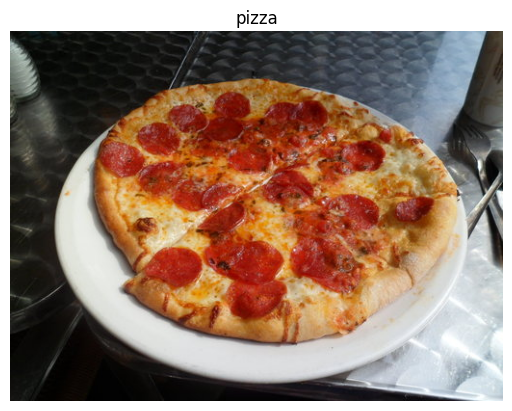

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/', target_class='pizza')

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 24,  24,  22],
        [ 14,  14,  12],
        [  9,   9,   7],
        ...,
        [ 77,  70,  54],
        [ 77,  74,  57],
        [ 79,  76,  59]],

       [[ 23,  23,  21],
        [ 15,  15,  13],
        [ 11,  11,   9],
        ...,
        [ 78,  71,  55],
        [ 79,  73,  57],
        [ 80,  74,  58]],

       [[ 21,  23,  20],
        [ 17,  19,  16],
        [ 12,  14,  11],
        ...,
        [ 79,  72,  56],
        [ 79,  73,  57],
        [ 78,  72,  56]],

       ...,

       [[ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20],
        ...,
        [196, 206, 215],
        [194, 204, 213],
        [193, 203, 212]],

       [[ 23,  22,  20],
        [ 22,  21,  19],
        [ 21,  20,  18],
        ...,
        [211, 221, 230],
        [209, 219, 228],
        [207, 217, 226]],

       [[ 23,  22,  20],
        [ 20,  19,  17],
        [ 18,  17,  15],
        ...,
        [220, 231, 23

In [11]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.09411765, 0.09411765, 0.08627451],
        [0.05490196, 0.05490196, 0.04705882],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.30196078, 0.2745098 , 0.21176471],
        [0.30196078, 0.29019608, 0.22352941],
        [0.30980392, 0.29803922, 0.23137255]],

       [[0.09019608, 0.09019608, 0.08235294],
        [0.05882353, 0.05882353, 0.05098039],
        [0.04313725, 0.04313725, 0.03529412],
        ...,
        [0.30588235, 0.27843137, 0.21568627],
        [0.30980392, 0.28627451, 0.22352941],
        [0.31372549, 0.29019608, 0.22745098]],

       [[0.08235294, 0.09019608, 0.07843137],
        [0.06666667, 0.0745098 , 0.0627451 ],
        [0.04705882, 0.05490196, 0.04313725],
        ...,
        [0.30980392, 0.28235294, 0.21960784],
        [0.30980392, 0.28627451, 0.22352941],
        [0.30588235, 0.28235294, 0.21960784]],

       ...,

       [[0.09019608, 0.08627451, 0.07843137],
        [0.09019608, 0.08627451, 0.07843137],
        [0.09019608, 0

## An end-to-end example
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also calles scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Epoch 1/5
47/47 [==============================] - 150s 3s/step - loss: 0.6055 - accuracy: 0.6660 - val_loss: 0.5711 - val_accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 121s 3s/step - loss: 0.4681 - accuracy: 0.7907 - val_loss: 0.3951 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 121s 3s/step - loss: 0.4150 - accuracy: 0.8187 - val_loss: 0.3423 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 114s 2s/step - loss: 0.3814 - accuracy: 0.8307 - val_loss: 0.3354 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 142s 3s/step - loss: 0.3458 - accuracy: 0.8540 - val_loss: 0.3128 - val_accuracy: 0.8760


**Note:** If the above cell is taking longer than 10seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware accelerator -> GPU (you may haveto rerun some cells above)

In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playgrouund model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 31s 574ms/step - loss: 0.7473 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 429ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 20s 419ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN model (model_1), model_2 performs terribly... let's try to improve it.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playgrouund model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 38s 738ms/step - loss: 2.1458 - accuracy: 0.6480 - val_loss: 0.4727 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.7416 - accuracy: 0.7047 - val_loss: 0.6535 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6412 - accuracy: 0.7273 - val_loss: 0.6266 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 30s 652ms/step - loss: 0.5996 - accuracy: 0.7373 - val_loss: 1.0893 - val_accuracy: 0.6200
Epoch 5/5
47/47 [==============================] - 42s 897ms/step - loss: 0.6172 - accuracy: 0.7560 - val_loss: 0.5191 - val_accuracy: 0.7500


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Creat a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7 Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1647351.jpg']
Image shape: (512, 512, 3)
['2757327.jpg']
Image shape: (512, 512, 3)


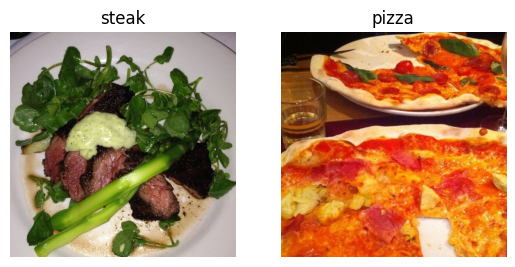

In [18]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza__img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [19]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
sets_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.


In [20]:
# Create train and test data generators and resale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [21]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                                target_size=(224, 224), # Target size of images (height, width)
                                                class_mode='binary', # Type of data you're working with
                                                batch_size=32) # Size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode='binary',
                                                batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the 'next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [23]:
# How many batches are there?
len(train_data)

47

In [24]:
1500/32

46.875

In [25]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [26]:
images[7].shape

(224, 224, 3)

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, your try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field of your problem).

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number od sliding windows going across an input (higher = more complex model)
        kernel_size=3, # the size of the sliding window going across an input
        strides=1, # the size of the step the sliding window takes across an input
        padding='valid', # if 'same', output shape is same as input shape, if 'valid', output shape gets compressed
        activation='relu',
        input_shape=(224, 224, 3)), # input layer(specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [30]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [31]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        # ,callbacks=[tensorboard_callback]
                        )

Epoch 1/5


47/47 [==============================] - 167s 4s/step - loss: 0.7909 - accuracy: 0.7080 - val_loss: 0.4457 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 154s 3s/step - loss: 0.4442 - accuracy: 0.8080 - val_loss: 0.5342 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 143s 3s/step - loss: 0.2822 - accuracy: 0.8927 - val_loss: 0.4000 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 139s 3s/step - loss: 0.1114 - accuracy: 0.9673 - val_loss: 0.5057 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 121s 3s/step - loss: 0.0254 - accuracy: 0.9960 - val_loss: 0.6621 - val_accuracy: 0.7920


### 5. Evaluating our model
It looks like our model is learning something, let's evaluate it.

<Axes: >

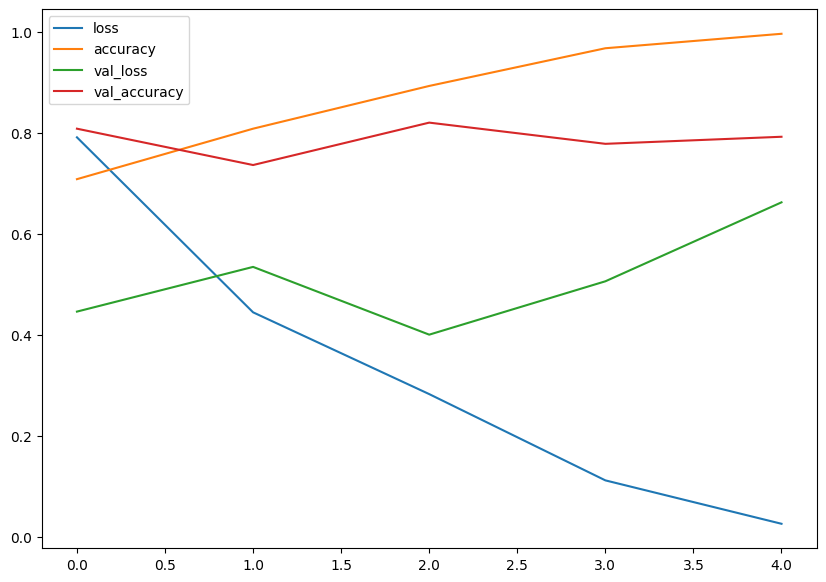

In [34]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [56]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics.
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and this the model's ability to generalize to unseen data will be diminished.

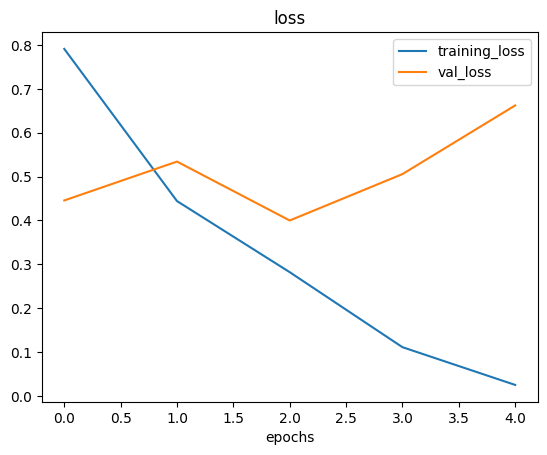

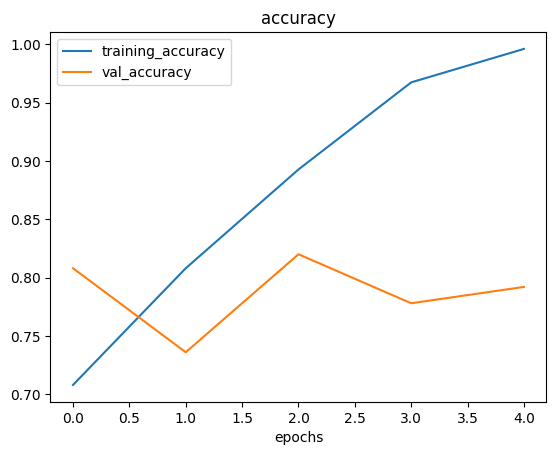

In [36]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (traininf loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add anothe dense layer to the output flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **regularization**.

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5


47/47 [==============================] - 68s 1s/step - loss: 0.6073 - accuracy: 0.6780 - val_loss: 0.4175 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.4585 - accuracy: 0.7973 - val_loss: 0.3541 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 50s 1s/step - loss: 0.3993 - accuracy: 0.8267 - val_loss: 0.3397 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.3749 - accuracy: 0.8393 - val_loss: 0.3121 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 52s 1s/step - loss: 0.3582 - accuracy: 0.8527 - val_loss: 0.3053 - val_accuracy: 0.8680


In [40]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [41]:
# Let's compare to previous model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


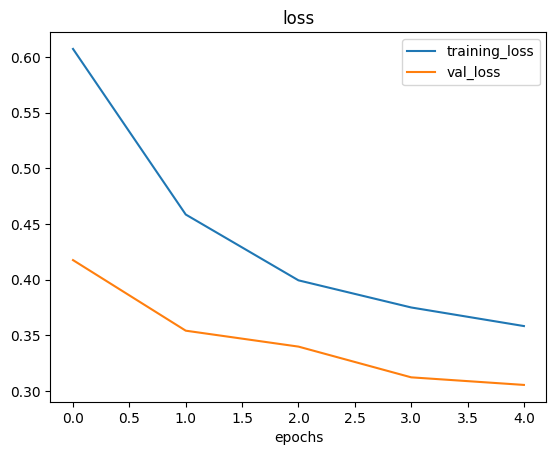

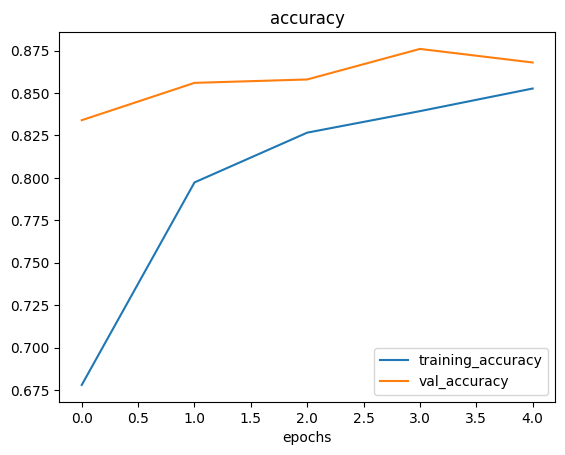

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn alloowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [44]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory( train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=False) # For demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory( train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(   test_dir,
                                                target_size=IMG_SIZE,
                                                batch_size=32,
                                                class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.


Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [45]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

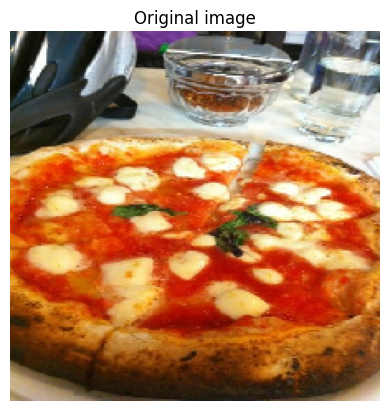

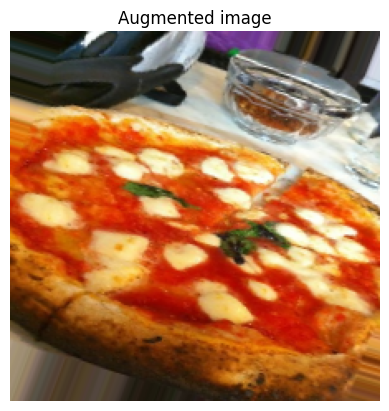

In [46]:
# Show original image aund augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False)

Now we've seen what augmented trainind date looks like, let's build a model and see how it learns on augmented data.

In [47]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 95s 2s/step - loss: 0.7171 - accuracy: 0.4600 - val_loss: 0.6895 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.6997 - accuracy: 0.5127 - val_loss: 0.6840 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 75s 2s/step - loss: 0.6871 - accuracy: 0.5853 - val_loss: 0.6572 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 70s 1s/step - loss: 0.6574 - accuracy: 0.6087 - val_loss: 0.6155 - val_accuracy: 0.5680
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.6333 - accuracy: 0.6280 - val_loss: 0.5316 - val_accuracy: 0.7720


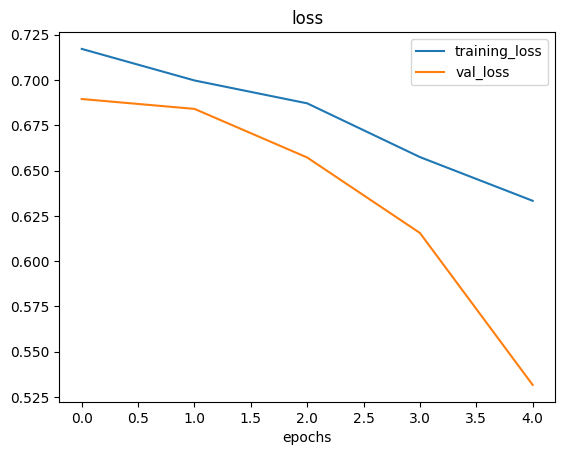

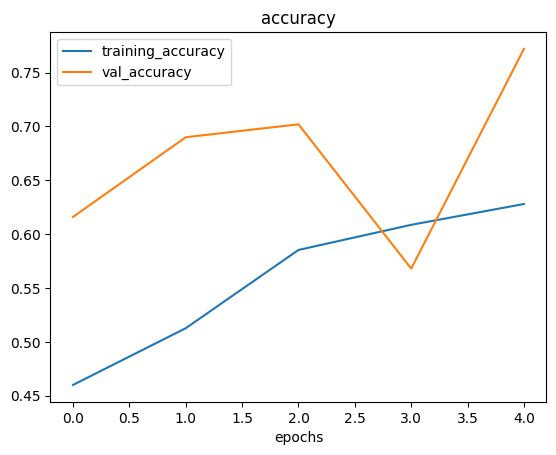

In [48]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shufle our augmented training data and train another model (the same as before) on it and see what happens.

In [49]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory( train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=True)

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy']
)

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.6711 - accuracy: 0.5833 - val_loss: 0.5830 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 66s 1s/step - loss: 0.5568 - accuracy: 0.7207 - val_loss: 0.4250 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 89s 2s/step - loss: 0.4916 - accuracy: 0.7733 - val_loss: 0.4104 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 88s 2s/step - loss: 0.4959 - accuracy: 0.7593 - val_loss: 0.3605 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 82s 2s/step - loss: 0.4829 - accuracy: 0.7713 - val_loss: 0.3771 - val_accuracy: 0.8540


In [51]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 10)       

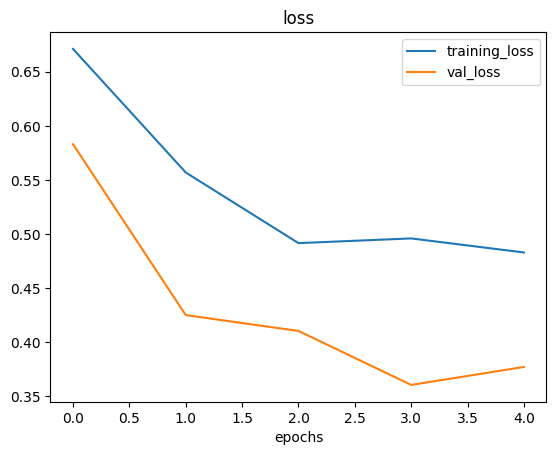

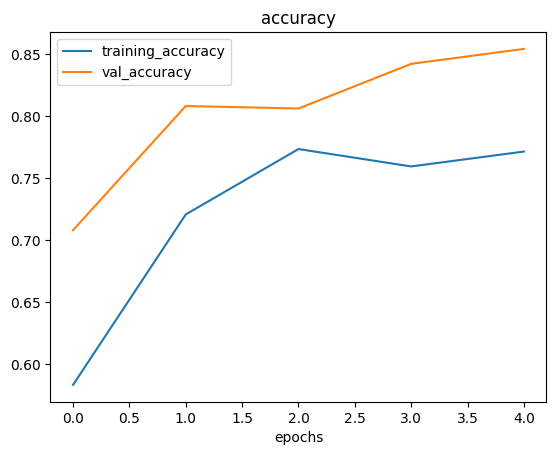

In [52]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn featured across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak.

### 7. Repeat until satisfaied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

### Making a prediction with our trained model on our own custom data

In [56]:
# Classes we're working with
print(class_names)

['pizza' 'steak']



Saved under 03-steak (2).jpeg


(-0.5, 3023.5, 4031.5, -0.5)

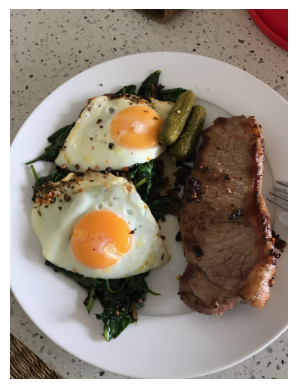

In [57]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [58]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [59]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [58]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
    '''
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    '''
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [61]:
# Load in and preprocess our custom image
steak = load_and_prep_image(('03-steak.jpeg'))
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [62]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 279ms/step


array([[0.873458]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediciton?

In [63]:
# Remid ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [64]:

# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model, filename, class_names=class_names):
    '''
    Imports an image located ad filename, makes a prediction with model and plots the image with the predicted class as the title
    '''
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 59ms/step


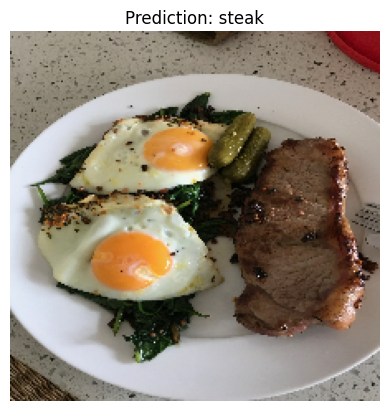

In [66]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg', class_names)

Our model works! Let's try it on another image... this time pizza


Saved under 03-pizza-dad (1).jpeg
1/1 [==============================] - 0s 39ms/step


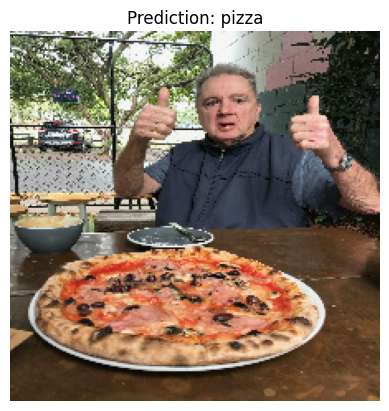

In [67]:
# Download another test custom image and make a prediction on it
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg', class_names)

# Multi-class Image Classification

We've just been trhrough a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model (over fit it to make sure it works)
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [68]:
import zipfile

!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downladed file
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()


Saved under 10_food_classes_all_data (1).zip


In [1]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data\test".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_curry".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_wings".
There are 0 directories and 250 images in "10_food_classes_all_data\test\fried_rice".
There are 0 directories and 250 images in "10_food_classes_all_data\test\grilled_salmon".
There are 0 directories and 250 images in "10_food_classes_all_data\test\hamburger".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ice_cream".
There are 0 directories and 250 images in "10_food_classes_all_data\test\pizza".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ramen".
There are 0 directories and 250 images in "10_food_classes_all_data\test\steak".
There are 0 directories and 250 images in "10_food_classes_all_data\test\sushi".
There are 

In [2]:
!python -m ls 10_food_classes_all_data

c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\tensorflow\Scripts\python.exe: No module named ls


In [3]:
ls 10_food_classes_all_data

 Volume in drive C has no label.
 Volume Serial Number is D872-C31F

 Directory of c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\10_food_classes_all_data

19/08/2023  10:40 a. m.    <DIR>          .
19/08/2023  10:40 a. m.    <DIR>          ..
19/08/2023  10:40 a. m.    <DIR>          test
19/08/2023  10:40 a. m.    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  169,325,830,144 bytes free


In [4]:
ls 10_food_classes_all_data\train\ice_cream

 Volume in drive C has no label.
 Volume Serial Number is D872-C31F

 Directory of c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\10_food_classes_all_data\train\ice_cream

19/08/2023  10:41 a. m.    <DIR>          .
19/08/2023  10:41 a. m.    <DIR>          ..
19/08/2023  01:38 p. m.            74,469 1012277.jpg
19/08/2023  01:38 p. m.            57,103 101858.jpg
19/08/2023  01:38 p. m.            48,319 102595.jpg
19/08/2023  01:38 p. m.            80,562 1044117.jpg
19/08/2023  01:38 p. m.            33,675 104465.jpg
19/08/2023  01:38 p. m.            92,877 1050427.jpg
19/08/2023  01:38 p. m.            37,388 1052863.jpg
19/08/2023  01:38 p. m.            42,445 1053680.jpg
19/08/2023  01:38 p. m.            45,152 1069788.jpg
19/08/2023  01:38 p. m.            65,811 1078154.jpg
19/08/2023  01:38 p. m.            53,517 1096437.jpg
19/08/2023  01:38 p. m.           132,570 1101126.jpg
19/08/2023  01:38 p. m.            37,828 1101478.jpg
19/08/2023 

In [11]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [12]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2437268.jpg']
Image shape: (512, 512, 3)


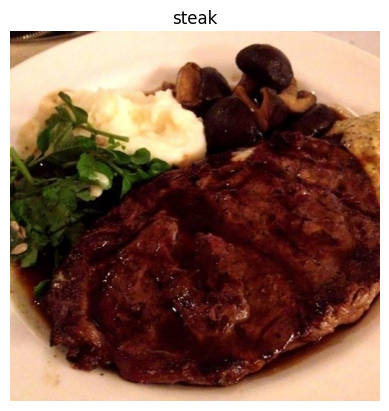

In [13]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)
We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [16]:
# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

### 4. Fit a model

In [17]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes 
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/3
235/235 [==============================] - 482s 2s/step - loss: 2.2088 - accuracy: 0.1715 - val_loss: 2.0362 - val_accuracy: 0.2600
Epoch 2/3
235/235 [==============================] - 490s 2s/step - loss: 1.9115 - accuracy: 0.3300 - val_loss: 2.0140 - val_accuracy: 0.2960
Epoch 3/3
235/235 [==============================] - 501s 2s/step - loss: 1.4121 - accuracy: 0.5268 - val_loss: 2.1157 - val_accuracy: 0.3032


In [18]:
len(train_data)

235

### 5. Evaluate the model

In [19]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 37s 464ms/step - loss: 2.1157 - accuracy: 0.3032


[2.1157405376434326, 0.30320000648498535]

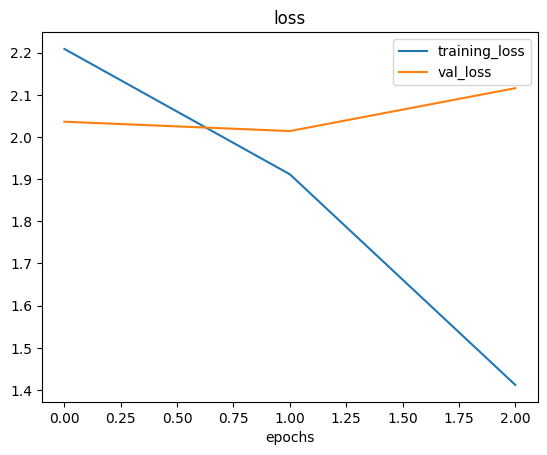

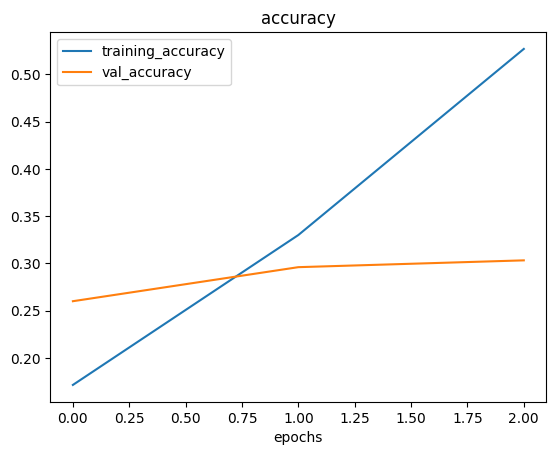

In [23]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on th test dataset.

### Try again to preprocess the data, this time shuffling the training data (NOT OFFICIAL)

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=123) # changed to categorical

test_data_shuffled = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True,
                                               seed=123)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [71]:
# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8_shuffled = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8_shuffled.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [72]:
# Fit the model
history_8_shuffled = model_8_shuffled.fit(train_data_shuffled, # now 10 different classes 
                        epochs=3,
                        steps_per_epoch=len(train_data_shuffled),
                        validation_data=test_data_shuffled,
                        validation_steps=len(test_data_shuffled))

Epoch 1/3
235/235 [==============================] - 487s 2s/step - loss: 2.1897 - accuracy: 0.1888 - val_loss: 1.9981 - val_accuracy: 0.2812
Epoch 2/3
235/235 [==============================] - 478s 2s/step - loss: 1.9064 - accuracy: 0.3336 - val_loss: 1.9405 - val_accuracy: 0.3056
Epoch 3/3
235/235 [==============================] - 526s 2s/step - loss: 1.5186 - accuracy: 0.4864 - val_loss: 2.0417 - val_accuracy: 0.2944


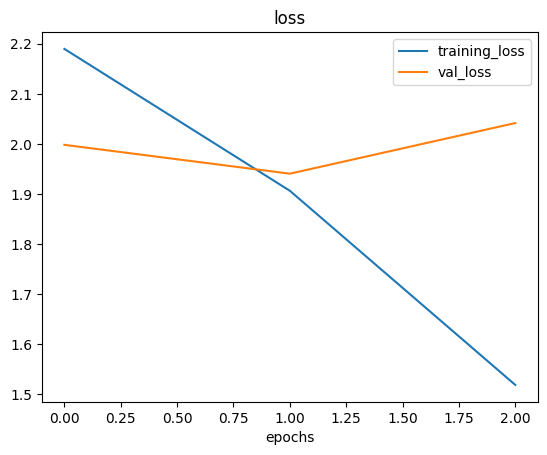

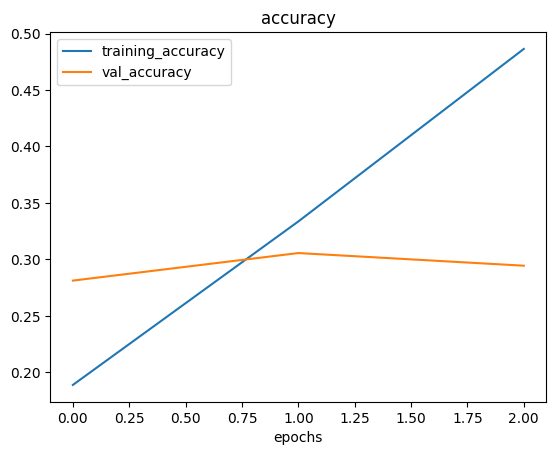

In [73]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8_shuffled)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives the model more opportunities to learn diverse patterns.
* **Simplify model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning** - transfer learning leverages the patterns (also called pretrained weights) another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [26]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...

model_9 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [27]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=3,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/3
235/235 [==============================] - 271s 1s/step - loss: 2.1338 - accuracy: 0.2340 - val_loss: 2.0345 - val_accuracy: 0.2700
Epoch 2/3
235/235 [==============================] - 197s 839ms/step - loss: 1.7953 - accuracy: 0.3923 - val_loss: 1.9680 - val_accuracy: 0.3020
Epoch 3/3
235/235 [==============================] - 247s 1s/step - loss: 1.4184 - accuracy: 0.5371 - val_loss: 2.0501 - val_accuracy: 0.3080


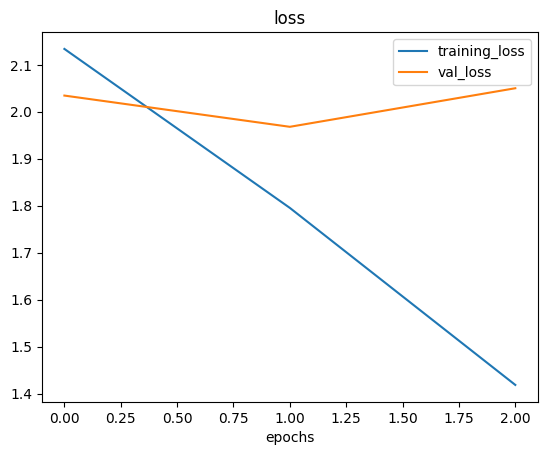

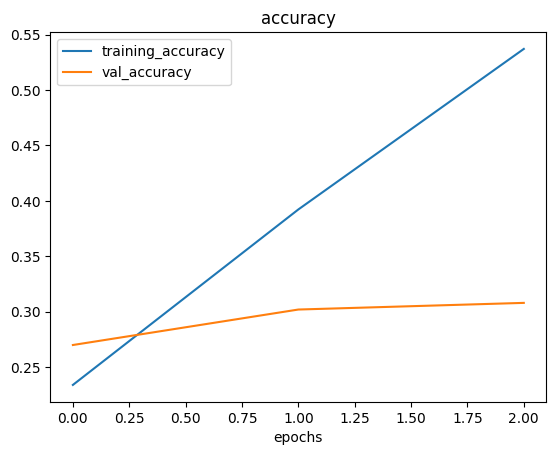

In [28]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our 'simplifying the model' experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss corves closer)
* Improve validation accuracy

In [30]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [41]:
# Let's create anothe model but this time we'll fit on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [42]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=3,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/3
235/235 [==============================] - 501s 2s/step - loss: 2.2230 - accuracy: 0.1749 - val_loss: 2.0258 - val_accuracy: 0.2800
Epoch 2/3
235/235 [==============================] - 493s 2s/step - loss: 2.0658 - accuracy: 0.2645 - val_loss: 1.9056 - val_accuracy: 0.3276
Epoch 3/3
235/235 [==============================] - 491s 2s/step - loss: 2.0291 - accuracy: 0.2899 - val_loss: 1.8907 - val_accuracy: 0.3460


In [43]:
model_8.evaluate(test_data)              

79/79 [==============================] - 42s 528ms/step - loss: 2.1157 - accuracy: 0.3032


[2.1157400608062744, 0.30320000648498535]

In [44]:
model_10.evaluate(test_data)

79/79 [==============================] - 42s 530ms/step - loss: 1.8907 - accuracy: 0.3460


[1.8907482624053955, 0.34599998593330383]

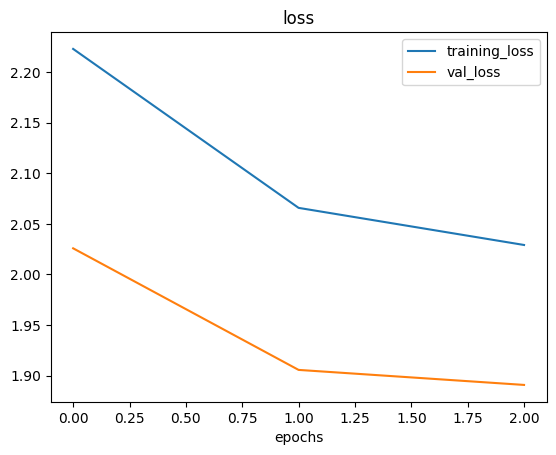

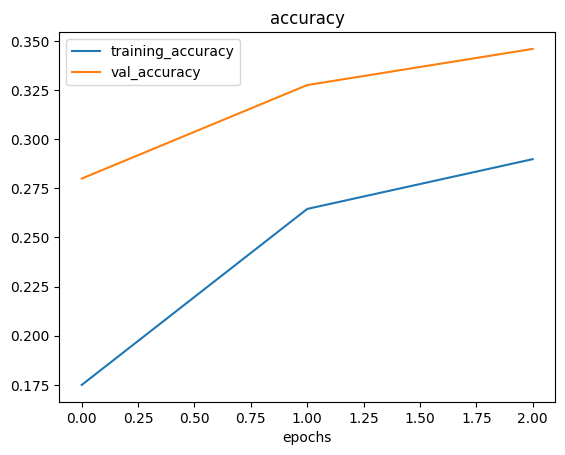

In [45]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

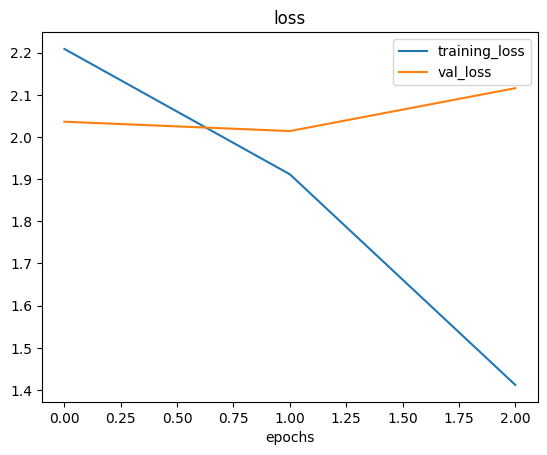

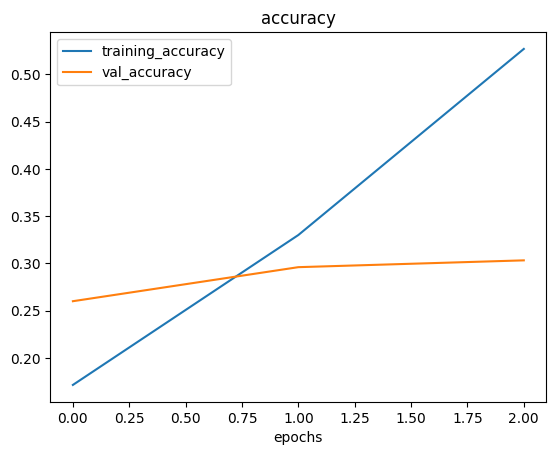

In [46]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How

By running lots of experiments, namely:
- resctructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer
- try **transfer learning**

### Making a prediction with our tained model

Let's use our trained model to make some predictions on our own custom images!

In [47]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [53]:
# Download some custom images
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!python -m wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!python -m https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

c:\Users\Ricardo Jaramillo\Documents\3_Personal\1_Courses\Python-Tensorflow\tensorflow\Scripts\python.exe: Error while finding module specification for 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg' (ModuleNotFoundError: No module named 'https://raw')


In [59]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    '''
    Imports an image located ad filename, makes a prediction with model and plots the image with the predicted class as the title
    '''
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multi-class &get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax((pred[0]))]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

1/1 [==============================] - 0s 196ms/step


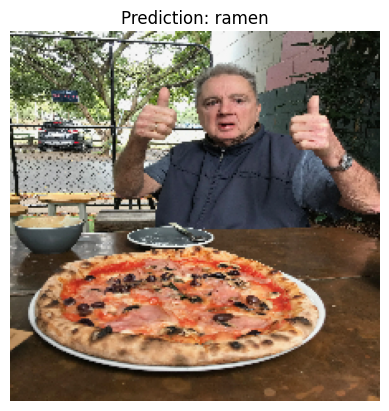

In [60]:
# Make a prediction using model_10
pred_and_plot(  model=model_10,
                filename='03-pizza-dad.jpeg',
                class_names=class_names)

1/1 [==============================] - 0s 61ms/step


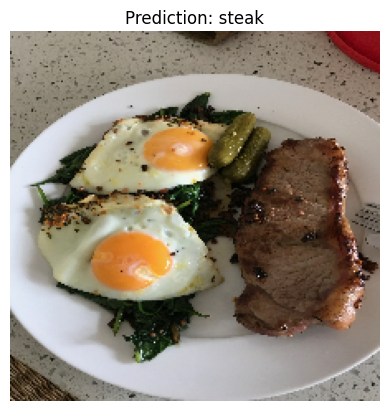

In [61]:
# Make a prediction using model_10
pred_and_plot(  model=model_10,
                filename='03-steak.jpeg',
                class_names=class_names)

1/1 [==============================] - 0s 51ms/step


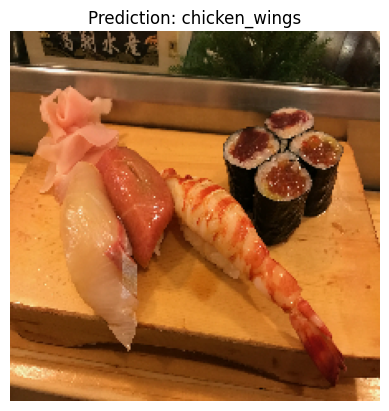

In [62]:
# Make a prediction using model_10
pred_and_plot(  model=model_10,
                filename='03-sushi.jpeg',
                class_names=class_names)

1/1 [==============================] - 0s 43ms/step


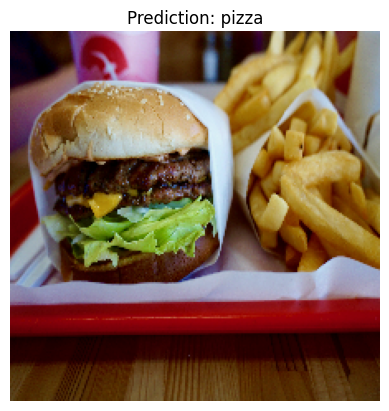

In [63]:
# Make a prediction using model_10
pred_and_plot(  model=model_10,
                filename='03-hamburger.jpeg',
                class_names=class_names)

Looks like our model didn't perform very well on our custom images but this becauseit only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data

In [64]:
# Good news: our updated pred_and_plot function works for binary classification too
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename='03-pizza-dad.jpeg',
              class_names=['pizza', 'steak'])

NameError: name 'model_3' is not defined

### Saving and loading our model

In [65]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [66]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 40s 493ms/step - loss: 1.8907 - accuracy: 0.3460


[1.890748381614685, 0.34599998593330383]

In [67]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 37s 469ms/step - loss: 1.8907 - accuracy: 0.3460


[1.8907488584518433, 0.34599998593330383]